In [1]:
import pymc as pm
import arviz as az
import numpy as np
from matplotlib import pyplot as plt

In [5]:
sigma = 0.02

with pm.Model() as model:
    v = pm.Normal('v', mu=0, sigma=sigma)
    trace = pm.sample(draws=1000, chains=4)
model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


v ~ Normal(0, 0.02)

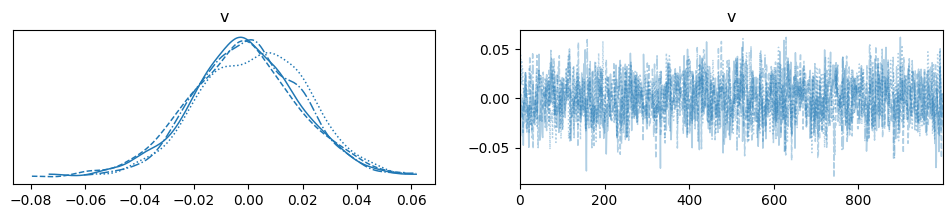

In [6]:
az.plot_trace(trace);

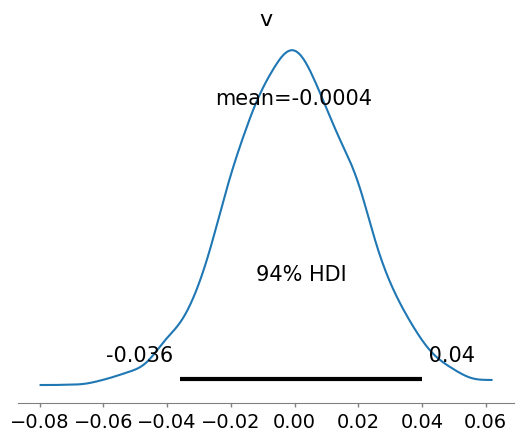

In [7]:
az.plot_posterior(trace);

In [8]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,-0.0,0.02,-0.036,0.04,0.001,0.0,1418.0,2579.0,1.01


In [9]:
# Dos variables mezcladas

In [10]:
sigma = 0.02

with pm.Model() as model:
    v = pm.Normal('v', mu=0, sigma = sigma)
    x = pm.Normal('x', mu=0, sigma = np.exp(v) )

    trace = pm.sample(draws=1000, chains=4)
model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


v ~ Normal(0, 0.02)
x ~ Normal(0, f(v))

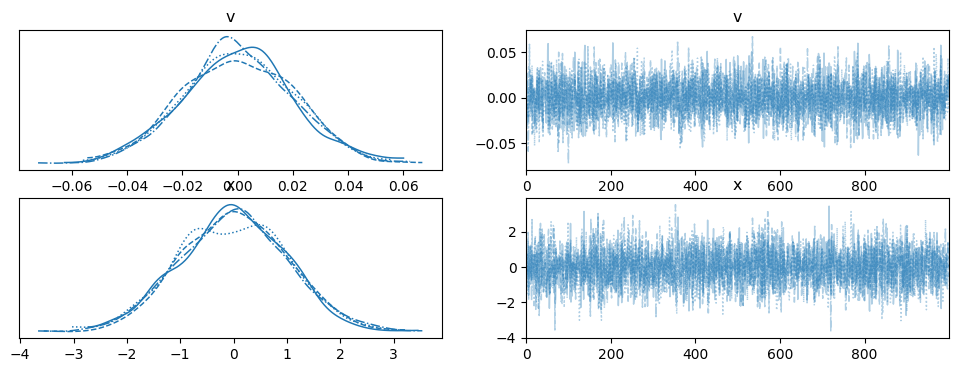

In [12]:
az.plot_trace(trace);

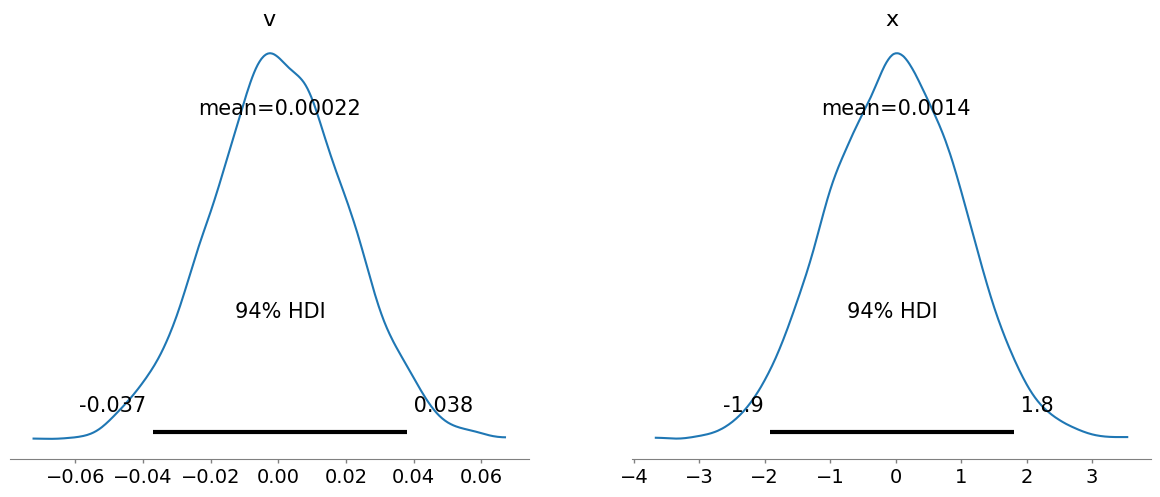

In [14]:
az.plot_posterior(trace);

In [15]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,0.000,0.020,-0.037,0.038,0.000,0.000,4022.0,2805.0,1.0
x,0.001,1.006,-1.921,1.809,0.017,0.015,3613.0,2776.0,1.0


In [21]:
samples = trace.posterior.to_dataframe().reset_index()
samples

,chain,draw,v,x
0,0,0,0.010229,1.349614
1,0,1,-0.029990,-1.191295
2,0,2,0.026931,-0.476918
3,0,3,-0.000188,0.291456
4,0,4,-0.026636,-0.489170
...,...,...,...,...
3995,3,995,0.004573,-1.141601
3996,3,996,0.002249,-1.234250
3997,3,997,0.020583,-0.185857
3998,3,998,0.000574,0.161612


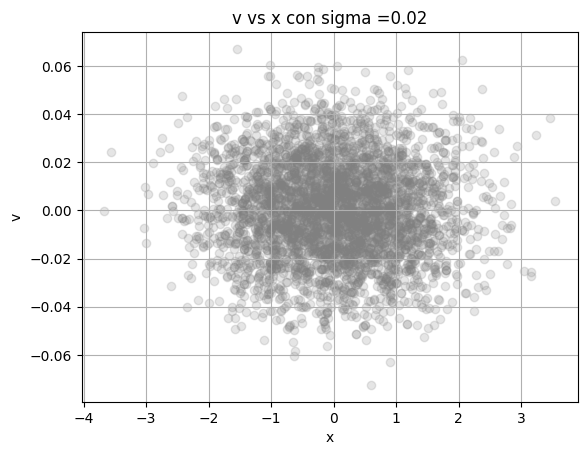

In [30]:
fix,ax = plt.subplots()
ax.scatter(samples["x"],samples["v"],alpha = .2, c="grey")
ax.grid()
ax.set_title(f"v vs x con sigma = {sigma}")
ax.set_xlabel("x")
ax.set_ylabel("v");

Rehagamos esto pero con $\sigma = 3$:

In [52]:
sigma = 3

with pm.Model() as model:
    v = pm.Normal('v', mu=0, sigma = sigma)
    x = pm.Normal('x', mu=0, sigma = np.exp(v) )

    trace = pm.sample(draws=1000, chains=4)
model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 496 divergences after tuning. Increase `target_accept` or reparameterize.


v ~ Normal(0, 3)
x ~ Normal(0, f(v))

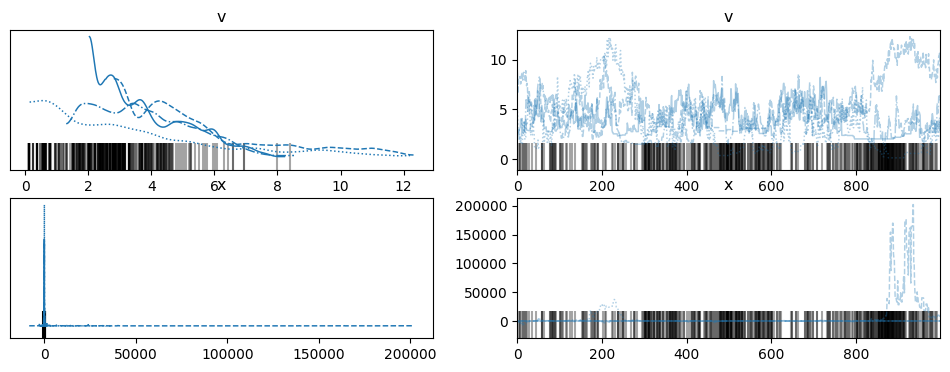

In [53]:
az.plot_trace(trace);

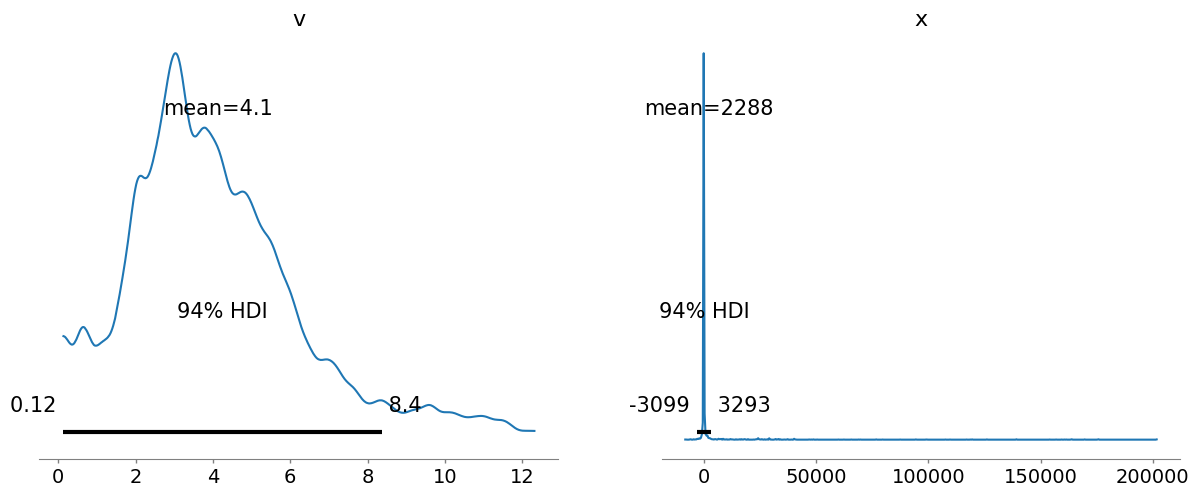

In [54]:
az.plot_posterior(trace);

In [55]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,4.124,2.279,0.121,8.364,0.556,0.400,15.0,19.0,1.21
x,2287.760,14464.446,-3098.957,3292.715,2423.526,1727.923,43.0,26.0,1.12


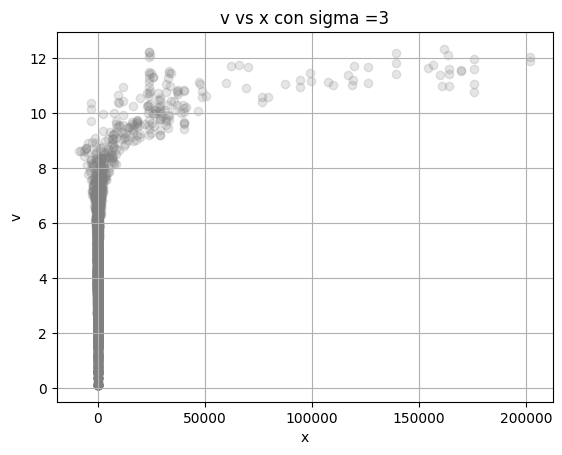

In [56]:
samples = trace.posterior.to_dataframe().reset_index()
fix,ax = plt.subplots()
ax.scatter(samples["x"],samples["v"],alpha = .2, c="grey")
ax.grid()
ax.set_title(f"v vs x con sigma ={sigma}")
ax.set_xlabel("x")
ax.set_ylabel("v");

In [58]:
np.median(samples["x"])

2.292647285401528

In [61]:
trace.sample_stats

<xarray.Dataset>
Dimensions:                (chain: 4, draw: 1000)
Coordinates:
  * chain                  (chain) int64 0 1 2 3
  * draw                   (draw) int64 0 1 2 3 4 5 ... 994 995 996 997 998 999
Data variables: (12/17)
    energy_error           (chain, draw) float64 0.0 2.462 ... 0.0004982
    perf_counter_diff      (chain, draw) float64 0.0003442 ... 0.0008801
    diverging              (chain, draw) bool True False False ... False False
    smallest_eigval        (chain, draw) float64 nan nan nan nan ... nan nan nan
    index_in_trajectory    (chain, draw) int64 0 -1 0 0 0 -2 3 ... -7 4 -6 5 3 5
    process_time_diff      (chain, draw) float64 0.0003442 ... 0.0008803
    ...                     ...
    energy                 (chain, draw) float64 8.138 10.62 ... 11.82 13.5
    n_steps                (chain, draw) float64 3.0 3.0 3.0 ... 7.0 3.0 11.0
    perf_counter_start     (chain, draw) float64 9.825e+04 ... 9.825e+04
    acceptance_rate        (chain, draw) float64 0.01023 0.02843 ... 0.8276
    largest_eigval         (chain, draw) float64 nan nan nan nan ... nan nan nan
    step_size_bar          (chain, draw) float64 0.1112 0.1112 ... 0.2735 0.2735
Attributes:
    created_at:                 2024-06-03T20:51:57.586207
    arviz_version:              0.12.1
    inference_library:          pymc
    inference_library_version:  5.5.0
    sampling_time:              4.701240301132202
    tuning_steps:               1000

In [62]:
trace.sample_stats.to_dataframe()

energy_error  perf_counter_diff  diverging  smallest_eigval  \
chain draw                                                                
0     0         0.000000           0.000344       True              NaN   
      1         2.461641           0.000355      False              NaN   
      2         0.000000           0.000323      False              NaN   
      3         0.000000           0.000313       True              NaN   
      4         0.000000           0.000207      False              NaN   
...                  ...                ...        ...              ...   
3     995      -0.022894           0.001178      False              NaN   
      996      -0.175842           0.000630      False              NaN   
      997      -0.003886           0.000598      False              NaN   
      998       0.003932           0.000309      False              NaN   
      999       0.000498           0.000880      False              NaN   

            index_in_trajectory  process_time_diff  step_size  tree_depth  \
chain draw                                                                  
0     0                       0           0.000344   0.045275           2   
      1                      -1           0.000355   0.045275           2   
      2                       0           0.000323   0.045275           2   
      3                       0           0.000313   0.045275           2   
      4                       0           0.000207   0.045275           1   
...                         ...                ...        ...         ...   
3     995                     4           0.001178   0.585560           4   
      996                    -6           0.000630   0.585560           3   
      997                     5           0.000598   0.585560           3   
      998                     3           0.000309   0.585560           2   
      999                     5           0.000880   0.585560           4   

                   lp  reached_max_treedepth  max_energy_error     energy  \
chain draw                                                                  
0     0     -7.254080                  False       2217.810819   8.137729   
      1     -8.766986                  False        575.841121  10.624689   
      2     -8.766986                  False        297.084352   9.467272   
      3     -8.766986                  False       2269.570311   9.974385   
      4     -8.766986                  False         73.103808  10.539769   
...               ...                    ...               ...        ...   
3     995   -9.517066                  False         -0.039629  11.090249   
      996  -11.518071                  False         -0.508362  13.894707   
      997  -11.276971                  False         -0.016656  12.101276   
      998  -11.747426                  False          0.004036  11.816962   
      999  -10.774495                  False          3.191245  13.501022   

            n_steps  perf_counter_start  acceptance_rate  largest_eigval  \
chain draw                                                                 
0     0         3.0        98246.131803     1.022593e-02             NaN   
      1         3.0        98246.132462     2.843161e-02             NaN   
      2         3.0        98246.132920     7.512820e-05             NaN   
      3         3.0        98246.133337     4.377481e-08             NaN   
      4         1.0        98246.133850     1.784102e-32             NaN   
...             ...                 ...              ...             ...   
3     995      15.0        98247.560861     1.000000e+00             NaN   
      996       7.0        98247.562122     9.440710e-01             NaN   
      997       7.0        98247.562836     9.991277e-01             NaN   
      998       3.0        98247.563540     9.963423e-01             NaN   
      999      11.0        98247.563934     8.276329e-01             NaN   

            step_size_bar  
chain draw     

In [63]:
trace.sample_stats.diverging.sum()

<xarray.DataArray 'diverging' ()>
array(496)

# Otra formulación

In [67]:
sigma = 3
with pm.Model() as otra:
    v = pm.Normal("v", mu = 0, sigma = sigma)
    z = pm.Normal("z", mu = 0, sigma = 1 )
    # Este de ahora es deterministico
    x = pm.Deterministic("x",z*np.exp(v))
    
    trace = pm.sample(draws=1000, chains=4)
model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


v ~ Normal(0, 3)
x ~ Normal(0, f(v))

In [ ]:
# NO hay hay divergencias ahora!

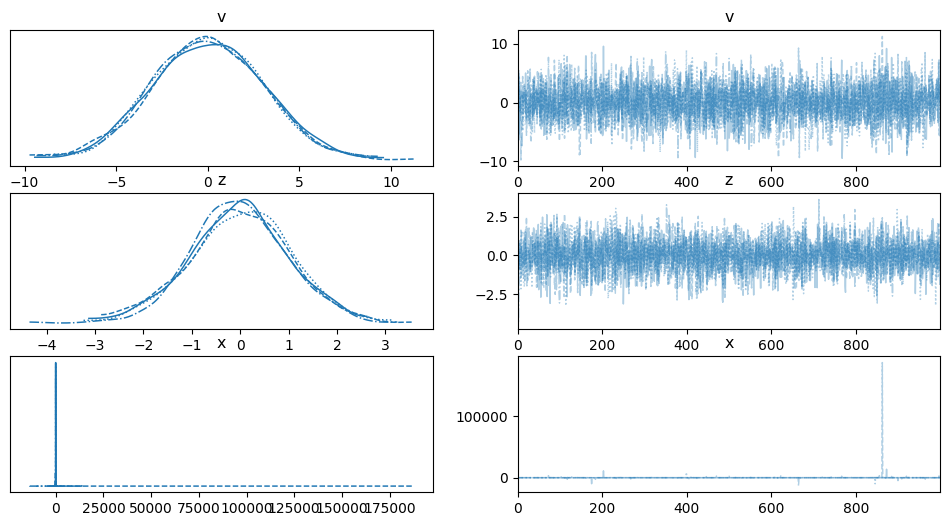

In [69]:
az.plot_trace(trace);

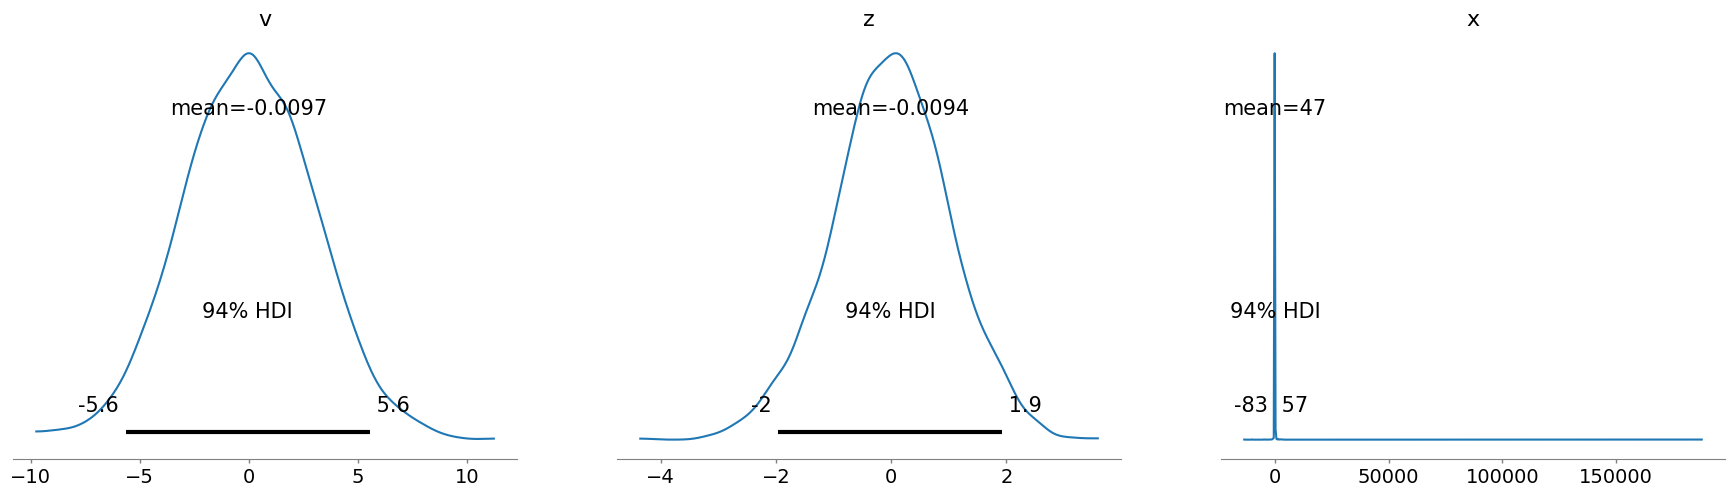

In [73]:
az.plot_posterior(trace);

In [72]:
az.summary(trace)
# El r hat es exactamente 1.0!

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,-0.010,3.019,-5.645,5.564,0.048,0.049,4009.0,2760.0,1.0
z,-0.009,1.015,-1.962,1.919,0.016,0.019,3833.0,2635.0,1.0
x,46.521,3011.051,-82.549,56.738,47.650,33.696,3272.0,3004.0,1.0


In [76]:

trace.sample_stats.diverging.sum()

<xarray.DataArray 'diverging' ()>
array(0)

Varios valores de sigma a la vez

In [77]:
# Generate a list of sigmas for the prior nu
sigmas = np.geomspace(0.025, 1, num=10)
sigmas

array([0.025     , 0.03766575, 0.05674836, 0.0854988 , 0.12881507,
       0.19407667, 0.29240177, 0.44054134, 0.66373288, 1.        ])

In [78]:
# Create dictionaries for storage
# samples for plotting
traces_C = dict()
traces_NC = dict()

# summary results
summary_C = dict()
summary_NC = dict()

# number of divergences
div_C = dict()
div_NC = dict()



In [79]:
for sigma in sigmas:

    # Centered model
    with pm.Model() as mC:
        v = pm.Normal("v", 0.0, sigma)
        x = pm.Normal("x", 0.0, pm.math.exp(v))
        trace_mC = pm.sample(draws=1000, tune=1000, chains=4)
        # Save results
        traces_C[sigma] = trace_mC
        summary_C[sigma] = az.summary(trace_mC)
        div_C[sigma] = trace_mC.sample_stats.diverging.sum()

    # Non-centered model
    with pm.Model() as mNC:
        v = pm.Normal("v", 0.0, sigma)
        z = pm.Normal("z", 0.0, 1.0)
        # transformed variable
        x = pm.Deterministic("x", z*np.exp(v))
        trace_mNC = pm.sample(draws=1000, tune=1000, chains=4)

        # Save results
        traces_NC[sigma] = trace_mNC
        summary_NC[sigma] = az.summary(trace_mNC)
        div_NC[sigma]= trace_mNC.sample_stats.diverging.sum()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There were 89 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 500 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


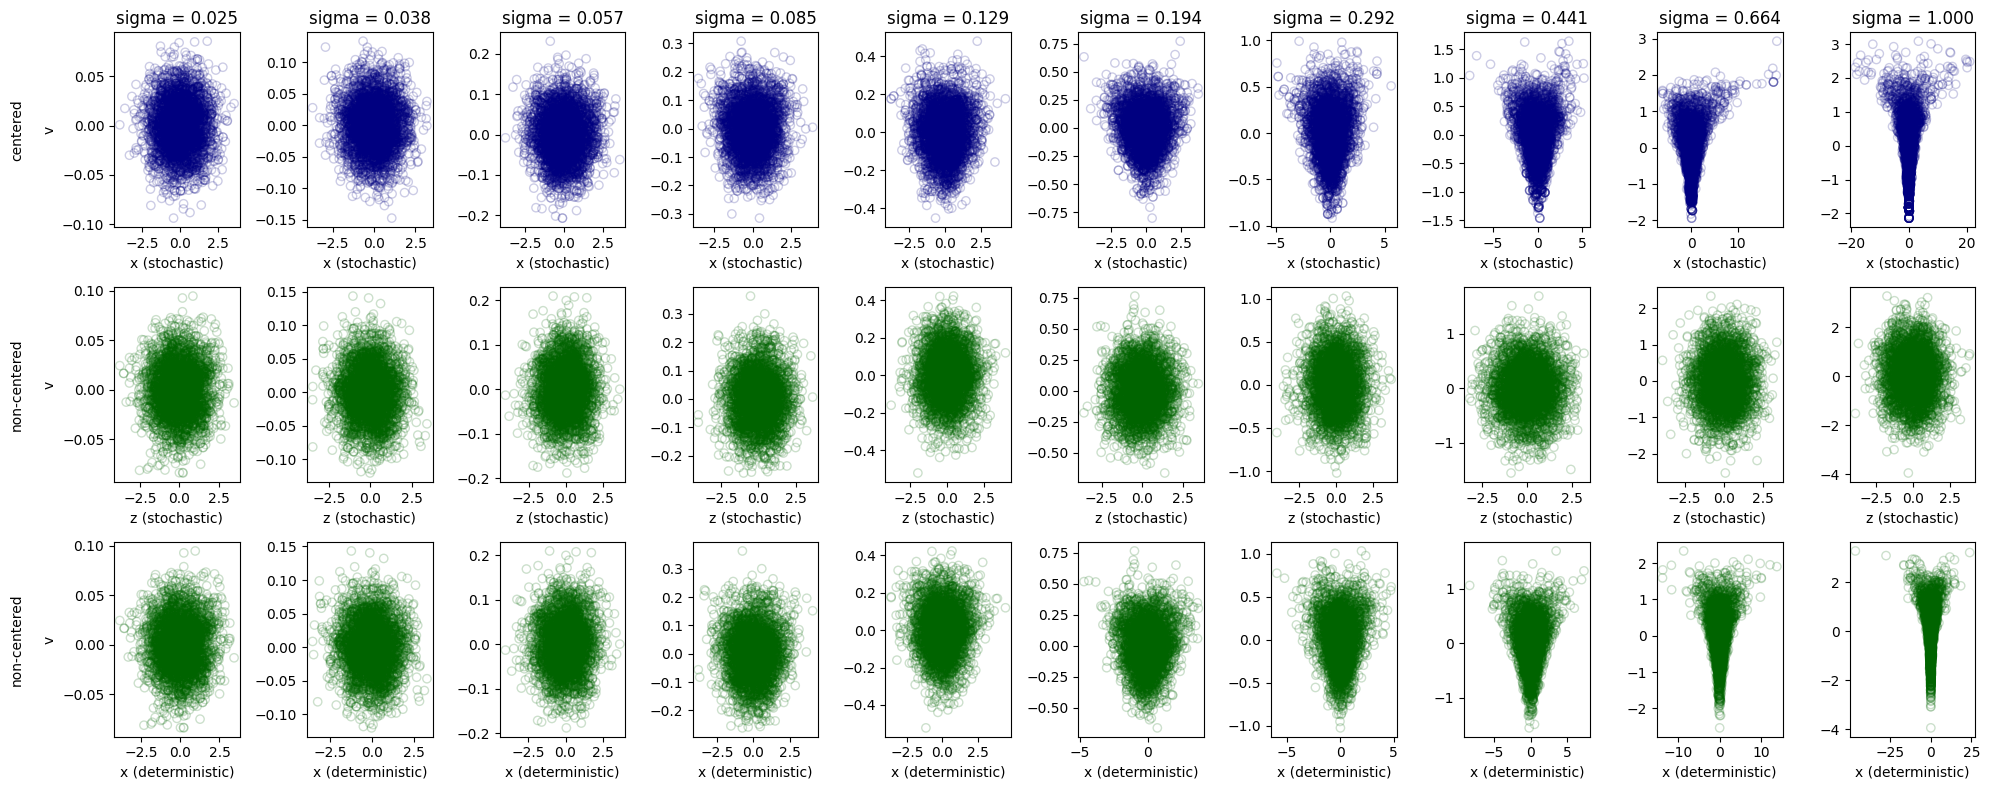

In [80]:

f, axes = plt.subplots(3, len(sigmas), figsize=(20, 8))

# top row: centered model
for i, (sigma, ax) in enumerate(zip(sigmas, axes[0])):
    samples_C = traces_C[sigma].posterior.to_dataframe().reset_index()
    ax.scatter(samples_C['x'], samples_C['v'], alpha=0.2, facecolors='none', edgecolors='navy')

    sigma_str = '{:.3f}'.format(sigma)
    ax.set_title(f'sigma = {sigma_str}')
    ax.set_xlabel('x (stochastic)')
    if i == 0:
        ax.set_ylabel('centered\n\nv')

# middle row: non-centered model, z on x-axis
for i, (sigma, ax) in enumerate(zip(sigmas, axes[1])):
    samples_NC = traces_NC[sigma].posterior.to_dataframe().reset_index()
    ax.scatter(samples_NC['z'], samples_NC['v'], alpha=0.2, facecolors='none', edgecolors='darkgreen')

    ax.set_xlabel('z (stochastic)')
    if i == 0:
        ax.set_ylabel('non-centered\n\nv')

# bottom row: non-centered model, x on x-axis
for i, (sigma, ax) in enumerate(zip(sigmas, axes[2])):
    samples_NC = traces_NC[sigma].posterior.to_dataframe().reset_index()
    ax.scatter(samples_NC['x'], samples_NC['v'], alpha=0.2, facecolors='none', edgecolors='darkgreen')

    ax.set_xlabel('x (deterministic)')
    if i == 0:
        ax.set_ylabel('non-centered\n\nv')

plt.tight_layout()
plt.show()

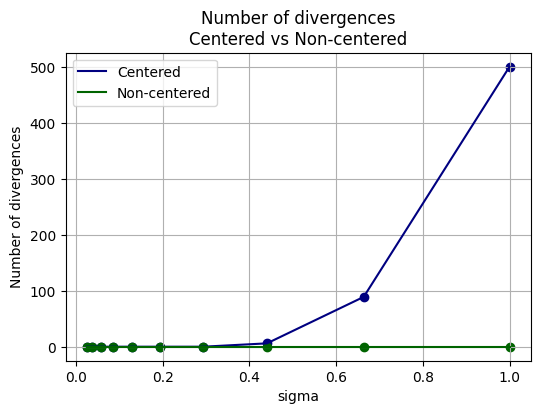

In [81]:
f, ax = plt.subplots(figsize=(6, 4))
ax.scatter(div_C.keys(), div_C.values(), color='navy')
ax.plot(div_C.keys(), div_C.values(), color='navy', label='Centered')
ax.scatter(div_NC.keys(), div_NC.values(), color='darkgreen')
ax.plot(div_NC.keys(), div_NC.values(), color='darkgreen', label='Non-centered')
ax.set(xlabel='sigma', ylabel='Number of divergences', title='Number of divergences\nCentered vs Non-centered')
ax.grid()
ax.legend();


Resumencito de lo que puede pasar:
- hay veces que cuando sampleamos aparecen divergencias. las divergencias dan cuenta de un sampleo malo y suelen darte coeficientes $\hat R> 1$
- una divergencia ocurre cuando una  integración numerica falla, y esto suele indicar problemas en la exploración de algunas regiones. 
- para solucionar esto, hay algunas alternativas:
  - reparametrizar
  - reducir el tamaño del paso, es decir, que el sampler vaya saltando entre alternativas más cercanas
  - hay otras
